This notebook uses the scipy [`lagrange`](https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/generated/scipy.interpolate.lagrange.html)
function to compute the Lagrange polynomial.

In [3]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-poster")

For some points $x$, define some data $y$ and create the Lagrange polynomial $f$, which has coefficients $p$, $1 + 3.5x - 1.5x^2$

In [4]:
x = [0.0, 1.0, 2.0]
y = [1.3, 3.1, 2.4]
f = lagrange(x, y)
p = Polynomial(f.coef[::-1]).coef

In [5]:
def lagrange_basis(x_i, y_i, x_new):
    """
    This function takes pairs of points (x_i, y_i) and, from a set of points x_new
    computes the Lagrange polynomial to return the interpolated values y_new
    """
    l = np.zeros((np.size(x_i), np.size(x_new)), dtype=np.float32)
    i = int(0)
    for xi, yi in zip(x_i, y_i):
        l[i, :] = np.prod( [(x_new - xj) / (xi - xj) for xj in x_i if xi != xj], axis=0)
        i = i + 1
    return l

Plot the data and the individual components of the polynomial

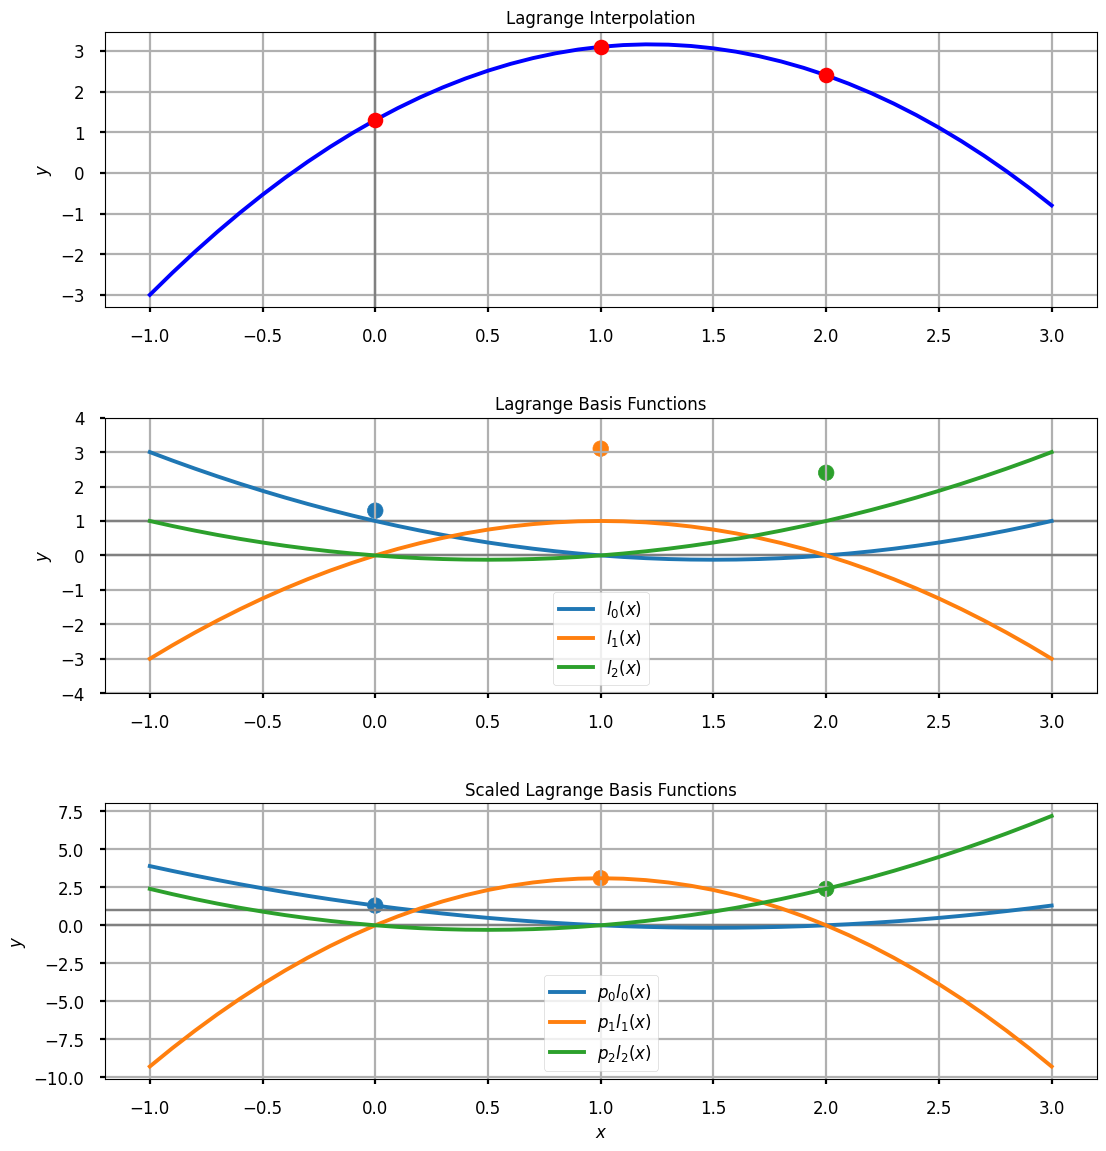

In [6]:
x_new = np.arange(-1.0, 3.1, 0.1)

test = lagrange_basis(x, y, x_new)
fig = plt.figure()
fig.subplots_adjust(top=1.3, hspace=0.4)
ax=fig.add_subplot(3,1,1)
ax.axvline(x=0.0, color="grey", linestyle="-", linewidth=1.75)
ax.plot(x_new, f(x_new), 'b', x, y, 'ro')
ax.set_title(r'Lagrange Interpolation', fontsize=12)
ax.grid()
ax.set_ylabel(r'$y$', fontsize=12)
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax1=fig.add_subplot(3,1,2)
ax1.axhline(y=0.0, color="grey", linestyle="-", linewidth=1.75)
ax1.axhline(y=1.0, color="grey", linestyle="-", linewidth=1.75)
ax1.scatter(np.array(x), np.array(y), c=['tab:blue', 'tab:orange', 'tab:green'])
ax1.plot(x_new, test[0,:], color='tab:blue', label='$l_0(x)$' )
ax1.plot(x_new, test[1,:], color='tab:orange', label='$l_1(x)$' )
ax1.plot(x_new, test[2,:], color='tab:green', label='$l_2(x)$' )
ax1.set_ylim([-4, 4])
ax1.grid()
ax1.set_ylabel(r'$y$', fontsize=12)
ax1.set_title(r'Lagrange Basis Functions', fontsize=12)
ax1.legend(prop={'size': 12})
ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)

ax2=fig.add_subplot(3,1,3)
ax2.grid()
ax2.axhline(y=0.0, color="grey", linestyle="-", linewidth=1.75)
ax2.axhline(y=1.0, color="grey", linestyle="-", linewidth=1.75)
ax2.scatter(np.array(x), np.array(y), c=['tab:blue', 'tab:orange', 'tab:green'])
ax2.plot(x_new, y[0]*test[0,:], color='tab:blue', label='$p_0 l_0(x)$')
ax2.plot(x_new, y[1]*test[1,:], color='tab:orange', label='$p_1 l_1(x)$' )
ax2.plot(x_new, y[2]*test[2,:], color='tab:green', label='$p_2 l_2(x)$' )
ax2.set_xlabel(r'$x$', fontsize=12)
ax2.set_ylabel(r'$y$', fontsize=12)
ax2.set_title(r'Scaled Lagrange Basis Functions', fontsize=12)
ax2.legend(prop={'size': 12})
ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.show()